In [3]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn

import tensorflow as tf
from tensorflow import keras

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [6]:
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
X = housing.data
y = housing.target

Separación de los datos:

In [8]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

Los datos de las X deben estar escaladas

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val =   scaler.transform(X_val)
X_test =  scaler.transform(X_test)

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
y_train

array([1.491, 0.675, 0.656, ..., 1.004, 2.25 , 1.604])

In [12]:
X_train.shape

(11610, 8)

### Creación de una red neuronal (modelo)

In [13]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(8,)), # Capa de entrada de 8 neuronas
    # Otra forma para ahorrar las 2 primeras líneas de la creación de la red neuronal:
    # keras.layers.Dense(30, activation='relu', input_shape=(8,)), Tiene una capa de entrada que tiene 8 neuronas
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)   # Capa de salida (un valor de salida)
])

Para decirle la **función de error** que va utilizar hay que compilar:

In [16]:
# Error Medio Cuadrático
model.compile(loss="mean_squared_error", 
              optimizer = keras.optimizers.SGD(learning_rate=0.001))

El **optimizador** es para gestionar los pesos de las neuronas

Para enseñar lo que tiene:

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

En caso de tener valores de validación se los ponemos:

In [18]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.5813 - val_loss: 1.1188
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.8828 - val_loss: 0.7165
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.7060 - val_loss: 0.6487
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.6507 - val_loss: 0.6109
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.6141 - val_loss: 0.5833
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.5866 - val_loss: 0.5622
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.5659 - val_loss: 0.5464
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.5506 - val_loss: 0.5341
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.5389 - val_loss: 0.5240
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.5295 - val_loss: 0.5155
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.5219 - val_loss: 0.5084
Epoch 12/20
363/363 ━━━━━━━━━━━━

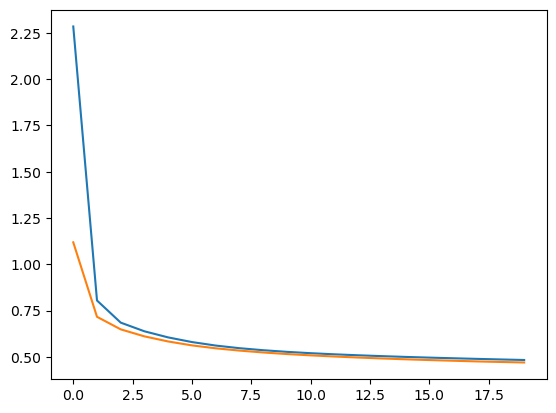

In [20]:
plt.plot(pd.DataFrame(model.history.history))

In [21]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.4807


0.4815446436405182

In [22]:
X_nueva = X_test[:3]
y_nueva = model.predict(X_nueva)
y_nueva

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[2.4461513],
       [0.5981704],
       [3.0528522]], dtype=float32)

In [25]:
model.save("modelito.keras")
# model = keras.models.load_model("modelito.h5")